<a href="https://colab.research.google.com/github/giannicha/aiffel/blob/main/rock_scissors_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive # 패키지 불러오기 

drive.mount("/content/drive"  )    # 드라이브 기본 경로


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
!pip install pillow   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import warnings
warnings.simplefilter('ignore')

import os
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub

from PIL import Image
import glob

tf.__version__

'2.8.2'

In [63]:
# os.path.join(path, *paths)
# Join one or more path components intelligently. 

rock_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp5/rock')
paper_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp5/paper')
scissors_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp5/scissor')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 100
total training paper images: 100
total training scissors images: 100


In [64]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(516,516)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
 

In [65]:
resize_images(rock_dir)
resize_images(paper_dir)
resize_images(scissors_dir)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [66]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=516
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp5')
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 516, 516, 3)
y_train shape: (300,)


라벨:  0


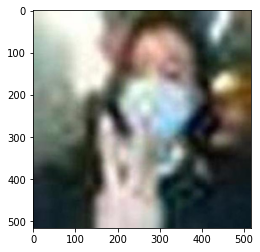

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [68]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [69]:
x_train_norm = x_train / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [70]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(516,516,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 514, 514, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 257, 257, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 255, 255, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 516128)            0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [71]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")


x_train_reshaped=x_train_norm.reshape( -1, 516, 516, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.


print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")


Before Reshape - x_train_norm shape: (300, 516, 516, 3)
After Reshape - x_train_reshaped shape: (300, 516, 516, 3)


In [72]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 2s 130ms/step - loss: 26.3702 - accuracy: 0.2933
Epoch 2/10
10/10 [==============================] - 1s 125ms/step - loss: 1.8392 - accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6820 - accuracy: 0.7467
Epoch 4/10
10/10 [==============================] - 1s 125ms/step - loss: 0.3945 - accuracy: 0.8800
Epoch 5/10
10/10 [==============================] - 1s 130ms/step - loss: 0.4785 - accuracy: 0.8400
Epoch 6/10
10/10 [==============================] - 1s 126ms/step - loss: 0.0285 - accuracy: 0.9967
Epoch 7/10
10/10 [==============================] - 1s 125ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 1s 135ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 1s 131ms/step - loss: 6.8457e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 1s 125ms/step - loss: 2.8824e-04 - accurac

In [86]:
# 테스트 이미지
test_dir_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/study_aiffel/Exp/exp5/test-set')
(x_test, y_test)=load_data(test_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_train shape: (300, 516, 516, 3)
y_train shape: (300,)


라벨:  0


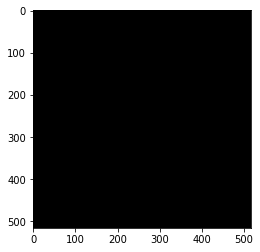

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [88]:
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")


x_test_reshaped=x_test_norm.reshape( -1, 516, 516, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.


print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_test_norm shape: (300, 516, 516, 3)
After Reshape - x_test_reshaped shape: (300, 516, 516, 3)


In [89]:
# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 1s - loss: 2.6077 - accuracy: 0.0000e+00 - 615ms/epoch - 62ms/step
test_loss: 2.607694625854492 
test_accuracy: 0.0


In [78]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [7.3704273e-02 9.2571896e-01 5.7670515e-04]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


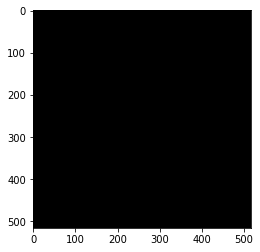

In [79]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [7.3704273e-02 9.2571896e-01 5.7670515e-04]
라벨: 0, 예측결과: 1


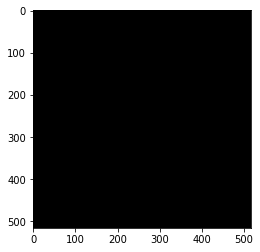

예측확률분포: [7.3704273e-02 9.2571896e-01 5.7670515e-04]
라벨: 0, 예측결과: 1


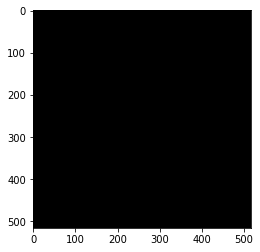

예측확률분포: [7.3704273e-02 9.2571896e-01 5.7670515e-04]
라벨: 0, 예측결과: 1


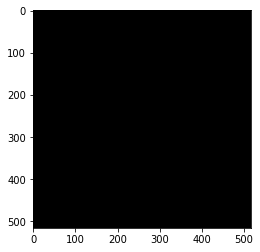

예측확률분포: [7.3704273e-02 9.2571896e-01 5.7670515e-04]
라벨: 0, 예측결과: 1


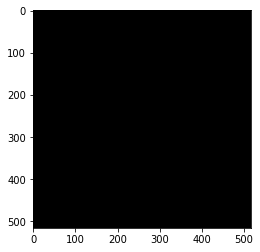

예측확률분포: [7.3704273e-02 9.2571896e-01 5.7670515e-04]
라벨: 0, 예측결과: 1


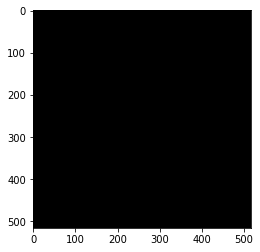

In [90]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [91]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(516,516,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 514, 514, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 257, 257, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 255, 255, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 516128)            0         
                                                                 
 dense_10 (Dense)            (None, 64)               